# Building NLP Models Using Python

**Learning Outcomes:**
1. Introduce fundamental concepts and techniques in AI
2. Implement AI solutions to real-world problems
3. Gain practical experience with AI algorithms using Python

## Outline
1. MNIST Classification with Neural Networks
2. Text Preprocessing for NLP
3. Text Classification using Naïve Bayes
4. Sentiment Analysis using LSTM
5. BERT text classification

## 1. MNIST Classification with Neural Networks

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8766 - loss: 0.4197 - val_accuracy: 0.9586 - val_loss: 0.1329
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9675 - loss: 0.1070 - val_accuracy: 0.9639 - val_loss: 0.1112
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9785 - loss: 0.0700 - val_accuracy: 0.9652 - val_loss: 0.1063
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9836 - loss: 0.0515 - val_accuracy: 0.9778 - val_loss: 0.0759
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9876 - loss: 0.0396 - val_accuracy: 0.9771 - val_loss: 0.0755
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.9732 - loss: 0.0888
Test accuracy: 97.71%


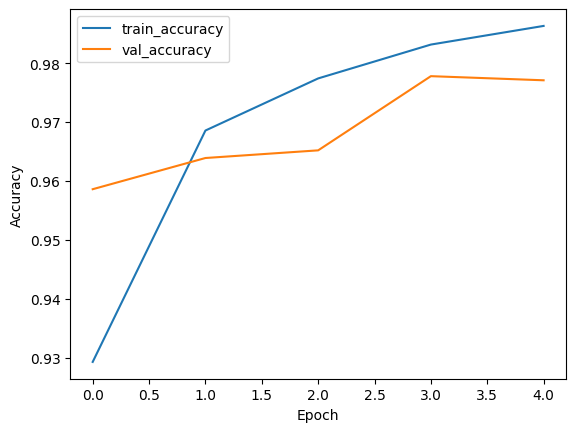

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build model
model_nn = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

# Compile and train
model_nn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model_nn.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate
loss, accuracy = model_nn.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2%}")

# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 2. Text Preprocessing for NLP

In [4]:
# Text preprocessing: tokenization, stopword removal, stemming, lemmatization
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # <-- Add this line

text = "Learning Python is amazing! NLP is very powerful."
words = word_tokenize(text)
filtered = [w for w in words if w.lower() not in stopwords.words('english')]
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stemmed = [stemmer.stem(w) for w in filtered]
lemmatized = [lemmatizer.lemmatize(w) for w in filtered]

print("Original:", words)
print("Filtered:", filtered)
print("Stemmed:", stemmed)
print("Lemmatized:", lemmatized)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fitrakacamarga/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fitrakacamarga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fitrakacamarga/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/fitrakacamarga/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Original: ['Learning', 'Python', 'is', 'amazing', '!', 'NLP', 'is', 'very', 'powerful', '.']
Filtered: ['Learning', 'Python', 'amazing', '!', 'NLP', 'powerful', '.']
Stemmed: ['learn', 'python', 'amaz', '!', 'nlp', 'power', '.']
Lemmatized: ['Learning', 'Python', 'amazing', '!', 'NLP', 'powerful', '.']


## 3. Text Classification using Naïve Bayes

Sample Preprocessed Corpus:
Original: This movie was fantastic, loved every minute.
Processed: movie fantastic loved every minute

Original: Absolutely terrible service, would not recommend.
Processed: absolutely terrible service would recommend

TF-IDF Matrix Shape: (18, 123)

Train size: 13, Test size: 5

Naïve Bayes Accuracy: 40.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.40      1.00      0.57         2

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5


Confusion Matrix:
[[0 3]
 [0 2]]


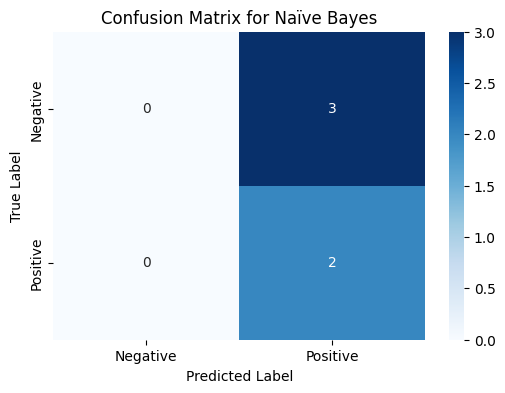


Predictions for new reviews:
Review: 'The plot was amazing and unpredictable' -> Predicted Sentiment: Positive
Review: 'Disappointing result, looking forward to the next one' -> Predicted Sentiment: Negative


In [10]:
# Enhanced Naive Bayes Example with Preprocessing and Evaluation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np # Import numpy for label handling

# Ensure NLTK resources are available (downloads likely handled in the previous cell)
# If running this cell independently, uncomment the downloads below:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

# Expanded Example Corpus (Sentiment Analysis) - Now 18 samples
corpus = [
    "This movie was fantastic, loved every minute.", # Positive
    "Absolutely terrible service, would not recommend.", # Negative
    "The product exceeded my expectations, excellent quality.", # Positive
    "A truly awful experience from start to finish.", # Negative
    "I'm very happy with my purchase, great value.", # Positive
    "The book was boring and predictable.", # Negative
    "Wonderful performance by the actors.", # Positive
    "Complete waste of time and money.", # Negative
    "Highly satisfied with the support team.", # Positive
    "The food was mediocre at best.", # Negative
    "An amazing journey, beautifully written.", # Positive
    "Disappointing result, expected much more.", # Negative
    "Great film, very engaging plot!", # Positive
    "The software is buggy and crashes often.", # Negative
    "Customer service was helpful and friendly.", # Positive
    "Not worth the price, very poor quality.", # Negative
    "Loved the atmosphere and the music.", # Positive
    "This is the worst product I have ever bought." # Negative
]
# Corresponding labels (ensure length matches corpus)
labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0] # 1: positive, 0: negative

# Preprocessing Function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower()) # Remove punctuation, lowercase
    words = word_tokenize(text)
    # Lemmatize and remove stopwords and non-alphabetic tokens
    filtered_words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words and w.isalpha()]
    return " ".join(filtered_words) # Return joined string for TfidfVectorizer

# Apply Preprocessing
preprocessed_corpus = [preprocess_text(doc) for doc in corpus]
print("Sample Preprocessed Corpus:")
for i in range(2):
    print(f"Original: {corpus[i]}")
    print(f"Processed: {preprocessed_corpus[i]}\n")

# Vectorization using TF-IDF (including bigrams)
vectorizer = TfidfVectorizer(ngram_range=(1, 2)) # Use unigrams and bigrams
X = vectorizer.fit_transform(preprocessed_corpus)
print(f"TF-IDF Matrix Shape: {X.shape}\n")

# Train/Test Split (using stratify)
# With 18 samples, test_size=0.25 gives ceil(4.5)=5 test samples
X_train, X_test, y_train_nb, y_test_nb = train_test_split(
    X, labels, test_size=0.25, random_state=42, stratify=labels
)
print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}\n")


# Train Naïve Bayes Model
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train_nb)

# Predict on Test Set
y_pred_nb = model_nb.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test_nb, y_pred_nb)
print(f"Naïve Bayes Accuracy: {accuracy:.2%}")

print("\nClassification Report:")
# Use zero_division=0 to handle cases where a class might not be predicted/present in the small test set
# Also specify labels=[0, 1] to ensure both classes appear even if one isn't in y_true or y_pred
print(classification_report(y_test_nb, y_pred_nb, labels=[0, 1], zero_division=0))

print("\nConfusion Matrix:")
# Ensure the confusion matrix uses the full set of labels [0, 1]
cm = confusion_matrix(y_test_nb, y_pred_nb, labels=[0, 1])
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
# Use fixed labels for the heatmap
tick_labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=tick_labels,
            yticklabels=tick_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naïve Bayes')
plt.show()

# Example Prediction on New Data
new_reviews = ["The plot was amazing and unpredictable", "Disappointing result, looking forward to the next one"]
preprocessed_new = [preprocess_text(review) for review in new_reviews]
X_new = vectorizer.transform(preprocessed_new)
new_predictions = model_nb.predict(X_new)

print("\nPredictions for new reviews:")
for review, prediction in zip(new_reviews, new_predictions):
    sentiment = "Positive" if prediction == 1 else "Negative"
    print(f"Review: '{review}' -> Predicted Sentiment: {sentiment}")

## 5. Sentiment Analysis using LSTM

Loading IMDB dataset with max_features=10000, max_len=200...
Loaded 25000 training samples and 25000 test samples.
Padding sequences...
Training data shape: (25000, 200)
Test data shape: (25000, 200)

Building LSTM model...


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training LSTM model...
Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 78s 197ms/step - accuracy: 0.7021 - loss: 0.5500 - val_accuracy: 0.8164 - val_loss: 0.4736
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 71s 183ms/step - accuracy: 0.8440 - loss: 0.3846 - val_accuracy: 0.8640 - val_loss: 0.3190
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 71s 183ms/step - accuracy: 0.9144 - loss: 0.2348 - val_accuracy: 0.8557 - val_loss: 0.3556

Evaluating model on test data...

LSTM Test Accuracy: 85.57%
LSTM Test Loss: 0.3556

Generating predictions on test set...
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.91      0.79      0.85     12500
    Positive       0.81      0.92      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000


Confusion Matrix:
[[ 9856  2644]
 [  964 11536]]


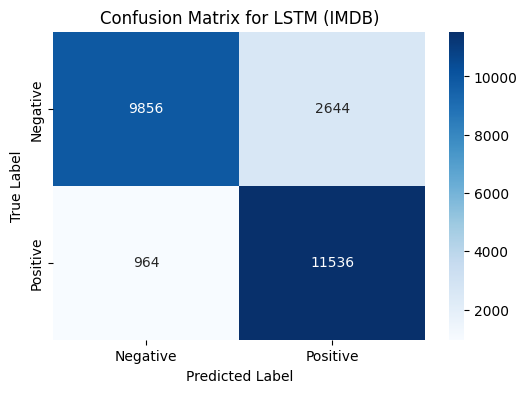


Predicting sentiment for custom reviews...
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Review: 'This movie was absolutely brilliant fantastic plot and acting'
Predicted Sentiment: Positive (Prob: 0.9854)

Review: 'A complete waste of time terrible film not recommended'
Predicted Sentiment: Positive (Prob: 0.9854)

Review: 'I really enjoyed it it was fun and heartwarming maybe the best'
Predicted Sentiment: Positive (Prob: 0.9854)

Review: 'The storyline was predictable and the characters were boring and dull'
Predicted Sentiment: Positive (Prob: 0.9854)



In [13]:
# Enhanced LSTM Sentiment Analysis Example
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout # Added Dropout
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re # For simple text cleaning

# Load IMDB dataset
max_features = 10000 # vocabulary size
max_len = 200 # max sequence length
print(f"Loading IMDB dataset with max_features={max_features}, max_len={max_len}...")
(X_train_imdb, y_train_imdb), (X_test_imdb, y_test_imdb) = imdb.load_data(num_words=max_features)
print(f"Loaded {len(X_train_imdb)} training samples and {len(X_test_imdb)} test samples.")

# Preprocess: Pad sequences
print("Padding sequences...")
X_train_seq = pad_sequences(X_train_imdb, maxlen=max_len)
X_test_seq = pad_sequences(X_test_imdb, maxlen=max_len)
print(f"Training data shape: {X_train_seq.shape}")
print(f"Test data shape: {X_test_seq.shape}")

# Build LSTM model (Added Dropout for regularization)
embedding_dim = 128
lstm_units_1 = 64
lstm_units_2 = 32

print("\nBuilding LSTM model...")
model_lstm = Sequential([
    Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=max_len),
    LSTM(lstm_units_1, return_sequences=True),
    Dropout(0.3), # Added dropout
    LSTM(lstm_units_2),
    Dropout(0.3), # Added dropout
    Dense(1, activation="sigmoid") # Sigmoid for binary classification
])

model_lstm.summary() # Print model architecture

# Compile and Train
model_lstm.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print("\nTraining LSTM model...")
history_lstm = model_lstm.fit(X_train_seq, y_train_imdb,
                           epochs=3, # Keep epochs low for a quick example
                           batch_size=64,
                           validation_data=(X_test_seq, y_test_imdb),
                           verbose=1) # Set verbose to 1 to see progress

# --- Enhanced Evaluation ---
print("\nEvaluating model on test data...")
loss_lstm, acc_lstm = model_lstm.evaluate(X_test_seq, y_test_imdb, verbose=0)
print(f"\nLSTM Test Accuracy: {acc_lstm:.2%}")
print(f"LSTM Test Loss: {loss_lstm:.4f}")

# Get predictions (probabilities)
print("\nGenerating predictions on test set...")
y_pred_prob = model_lstm.predict(X_test_seq)
# Convert probabilities to class labels (0 or 1)
y_pred_lstm = (y_pred_prob > 0.5).astype("int32").flatten() # Flatten for metrics

# 1. Classification Report
print("\nClassification Report:")
target_names = ['Negative', 'Positive']
print(classification_report(y_test_imdb, y_pred_lstm, target_names=target_names))

# 2. Confusion Matrix
print("\nConfusion Matrix:")
cm_lstm = confusion_matrix(y_test_imdb, y_pred_lstm)
print(cm_lstm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LSTM (IMDB)')
plt.show()

# 3. Prediction on Custom Reviews
print("\nPredicting sentiment for custom reviews...")
word_index = imdb.get_word_index()
# The index is offset by 3 (0: padding, 1: start, 2: unknown/OOV)
index_from = 3
word_to_id = {w: (i + index_from) for w, i in word_index.items() if (i + index_from) < max_features} # Limit to max_features
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

def preprocess_custom_review(text):
    # Simple preprocessing: lowercase, remove non-alphanumeric, split
    text = re.sub(r'[^\w\s]', '', text.lower())
    words = text.split()
    # Convert words to IDs, using 2 for unknown words (OOV)
    encoded_review = [word_to_id.get(word, 2) for word in words]
    # Add the start index
    encoded_review = [1] + encoded_review
    # Pad the sequence
    padded_review = pad_sequences([encoded_review], maxlen=max_len, padding='post', truncating='post')
    return padded_review

custom_reviews = [
    "This movie was absolutely brilliant fantastic plot and acting",
    "A complete waste of time terrible film not recommended",
    "I really enjoyed it it was fun and heartwarming maybe the best",
    "The storyline was predictable and the characters were boring and dull"
]

for review in custom_reviews:
    preprocessed = preprocess_custom_review(review)
    prediction_prob = model_lstm.predict(preprocessed, verbose=0)[0][0]
    sentiment = "Positive" if prediction_prob > 0.5 else "Negative"
    print(f"Review: '{review}'\nPredicted Sentiment: {sentiment} (Prob: {prediction_prob:.4f})\n")


# BERT text classification

In [1]:
import torch
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load the IMDB dataset
dataset = load_dataset("imdb")

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenization function
def tokenize_batch(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=128)

# Tokenize dataset
tokenized = dataset.map(tokenize_batch, batched=True)
tokenized = tokenized.remove_columns(["text"])
tokenized.set_format("torch")

# Create train and test splits
train_dataset = tokenized["train"]
test_dataset = tokenized["test"]


/Users/fitrakacamarga/project/self/ai_courses/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Map: 100%|██████████| 50000/50000 [00:07<00:00, 6600.34 examples/s]


In [2]:
# Load pre-trained BERT model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
# Define metric computation
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

# Setup training arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset.select(range(2000)),  # Subset for quick run
    eval_dataset=test_dataset.select(range(1000)),
    compute_metrics=compute_metrics,
)


In [4]:
# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()
print(eval_results)


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.000222,1.000000,0.000000,0.000000,0.000000
2,0.009300,0.000140,1.000000,0.000000,0.000000,0.000000


/Users/fitrakacamarga/project/self/ai_courses/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fitrakacamarga/project/self/ai_courses/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fitrakacamarga/project/self/ai_courses/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

{'eval_loss': 0.00014005428238306195, 'eval_accuracy': 1.0, 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1': 0.0, 'eval_runtime': 7.3143, 'eval_samples_per_second': 136.718, 'eval_steps_per_second': 17.09, 'epoch': 2.0}


/Users/fitrakacamarga/project/self/ai_courses/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fitrakacamarga/project/self/ai_courses/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fitrakacamarga/project/self/ai_courses/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

In [ ]:
# Display a few sample predictions
for sample in test_dataset.select(range(5)):
    inputs = tokenizer(sample["review"], return_tensors="pt", truncation=True, padding=True, max_length=128)
    outputs = model(**inputs)
    pred = torch.argmax(outputs.logits, dim=1).item()
    print(sample["text"][:100], "... Prediction:", "Positive" if pred == 1 else "Negative")
